In [ ]:
!pip install python-binance ta

Strategy: Open: The price enters the Bollinger cloud from below (previous price < inf BB + current price > inf BB) + price < EMA9. TP and SL

In [53]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

client = Client(tld='us')
pair_symbol = "BTCUSDT"
time_interval = Client.KLINE_INTERVAL_1HOUR
start_date = "01 january 2020"
end_date = "30 june 2022"

klinesT = client.get_historical_klines(pair_symbol, time_interval, start_date, end_date)

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

df.drop(columns = df.columns.difference(['timestamp','open','high','low','close','volume']), inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col])

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

df

,open,high,low,close,volume
timestamp,,,,,
2020-01-01 00:00:00,7180.46,7182.19,7175.62,7175.62,1.675424
2020-01-01 01:00:00,7178.39,7226.82,7178.39,7212.38,4.299518
2020-01-01 02:00:00,7213.97,7238.03,7212.30,7238.03,4.444675
2020-01-01 03:00:00,7237.88,7237.88,7221.65,7230.71,2.340828
2020-01-01 04:00:00,7226.19,7226.19,7216.00,7216.00,0.614507
...,...,...,...,...,...
2022-06-29 20:00:00,20218.71,20439.60,20124.95,20216.73,135.954615
2022-06-29 21:00:00,20230.98,20359.96,20197.66,20302.57,28.968957
2022-06-29 22:00:00,20303.17,20326.70,20150.69,20218.37,39.857942


In [54]:
df['SMA9'] = ta.trend.sma_indicator(close = df['close'], window = 9)
df['SMA200'] = ta.trend.sma_indicator(close = df['close'], window = 200)

df["BOL_HIGHER"] = ta.volatility.bollinger_hband_indicator(df['close'],window=20,window_dev=2)
df["BOL_LOWER"] = ta.volatility.bollinger_lband_indicator(df['close'],window=20,window_dev=2)

df["KEL_HIGHER"] = ta.volatility.keltner_channel_hband_indicator(df['high'],df['low'],df['close'],window=20,window_atr=10)
df["KEL_LOWER"] = ta.volatility.keltner_channel_lband_indicator(df['high'],df['low'],df['close'],window=20,window_atr=10)

df["ATR"] = ta.volatility.average_true_range(df['high'],df['low'],df['close'],window=2)

df

,open,high,low,close,volume,SMA9,SMA200,BOL_HIGHER,BOL_LOWER,KEL_HIGHER,KEL_LOWER,ATR
timestamp,,,,,,,,,,,,
2020-01-01 00:00:00,7180.46,7182.19,7175.62,7175.62,1.675424,NaN,NaN,0.0,0.0,0.0,0.0,0.000000
2020-01-01 01:00:00,7178.39,7226.82,7178.39,7212.38,4.299518,NaN,NaN,0.0,0.0,0.0,0.0,28.885000
2020-01-01 02:00:00,7213.97,7238.03,7212.30,7238.03,4.444675,NaN,NaN,0.0,0.0,1.0,0.0,27.307500
2020-01-01 03:00:00,7237.88,7237.88,7221.65,7230.71,2.340828,NaN,NaN,0.0,0.0,0.0,0.0,21.843750
2020-01-01 04:00:00,7226.19,7226.19,7216.00,7216.00,0.614507,NaN,NaN,0.0,0.0,0.0,0.0,18.276875
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,20218.71,20439.60,20124.95,20216.73,135.954615,20098.311111,20839.00845,0.0,0.0,0.0,0.0,242.218203
2022-06-29 21:00:00,20230.98,20359.96,20197.66,20302.57,28.968957,20130.561111,20832.36840,0.0,0.0,0.0,0.0,202.259101
2022-06-29 22:00:00,20303.17,20326.70,20150.69,20218.37,39.857942,20145.798889,20825.54085,0.0,0.0,0.0,0.0,189.134551


Period: [2020-01-01 00:00:00] -> [2022-06-30 00:00:00]
Initial wallet: 1000.0 $

- General Information -
Final wallet: 2310.55 $
Performance vs US dollar: 131.05 %
Worst Drawdown : -26.39%
Buy and hold performance: 179.24 %
Performance vs buy and hold: -17.26 %
Total trades on the period: 107
Global Win rate: 39.25 %
Average Profit: 0.98 %
Total fee: 289.01 $

Best trades: +9.4 % the 2020-08-17 15:00:00
Worst trades: -7.82 % the 2021-11-16 10:00:00


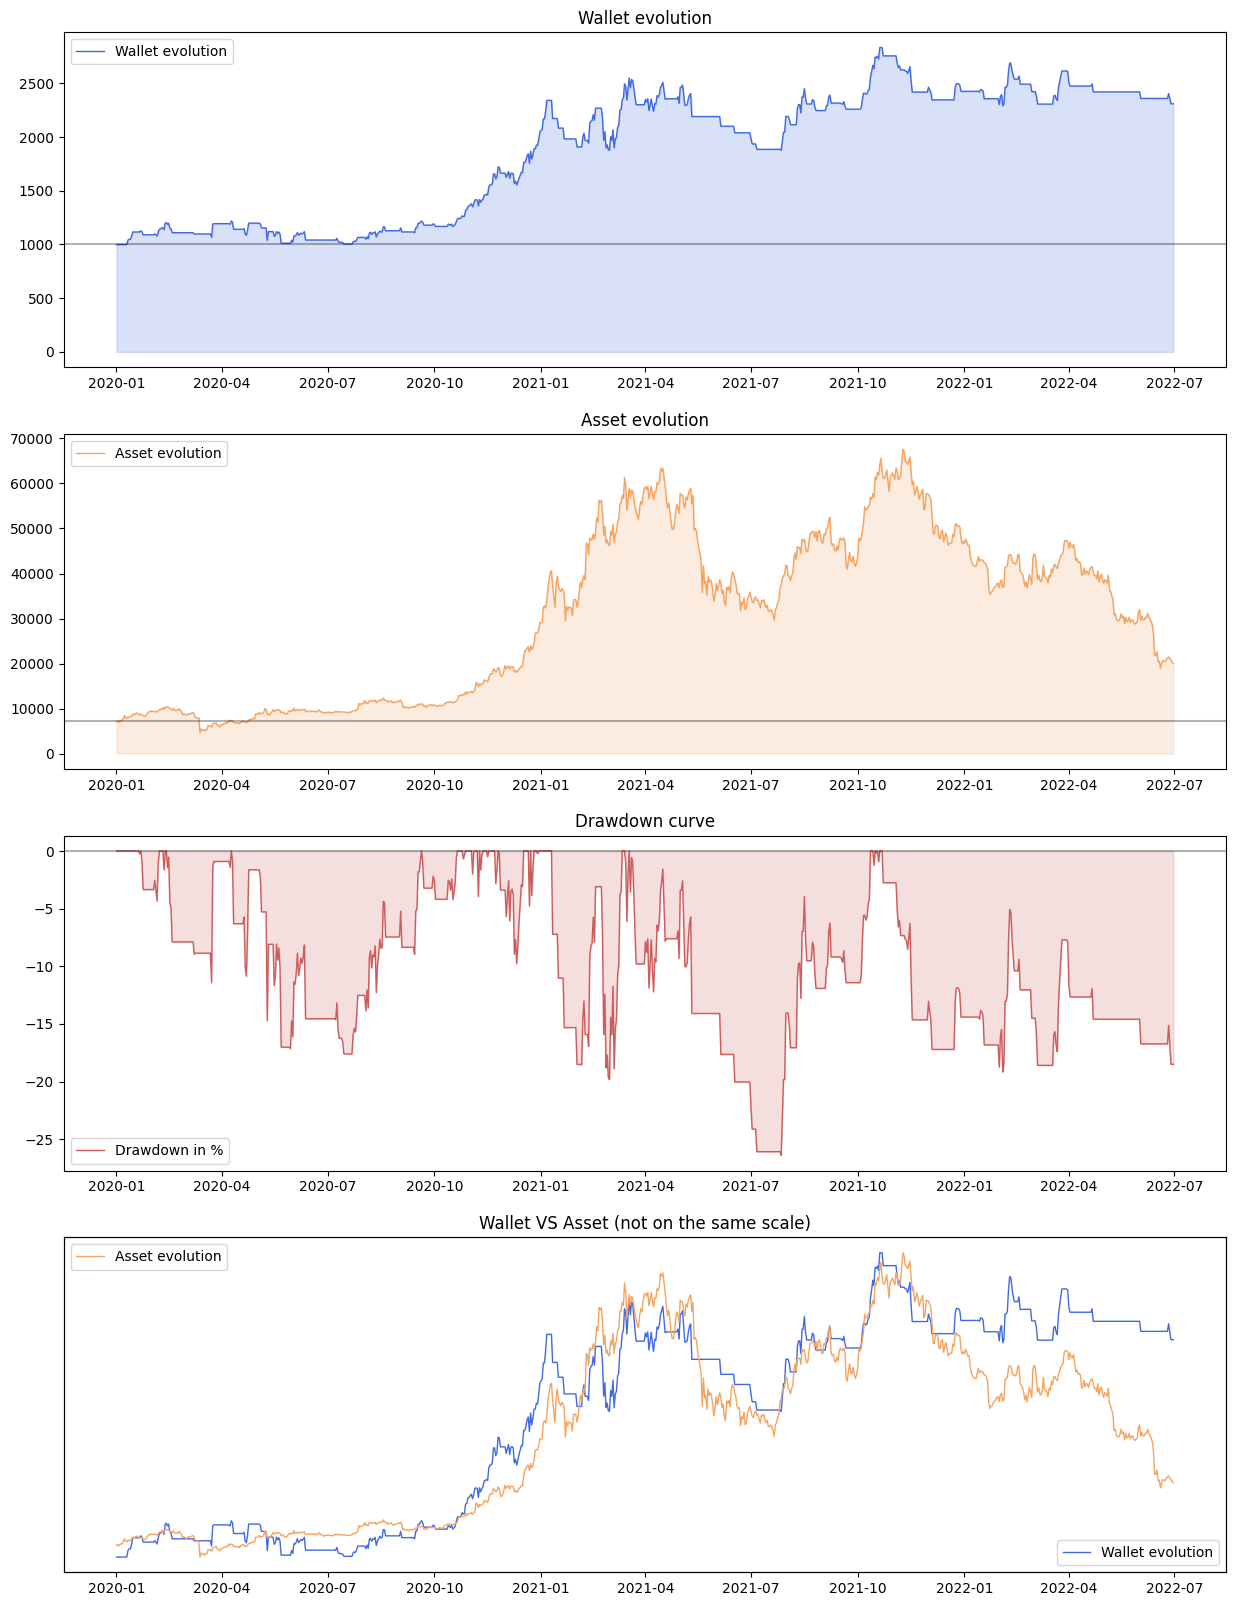

In [55]:
dfTest = df.copy()
initial_wallet = 1000
taker_fee = 0.0007

sl_price = 0
tp_price = 1000000

wallet = initial_wallet
usd = initial_wallet
coin = 0

trades_hitory = []
days_history = []
previous_day = 0
buy_ready = True

previous_row = df.iloc[0].copy()

#The price enters the Bollinger cloud + price < EMA9
def buy_condition(row, previous_row=None):
    if row["BOL_LOWER"] == 0 and previous_row["BOL_LOWER"] == 1 and row['close'] > row['SMA200'] and row['close'] < row['SMA9']:
        return True
    else:
        return False
    
#No sell condition, we wait for the take profit, can be modified
def sell_condition(row, previous_row=None):
    if row['close'] > 10000000 :
        return True
    else:
        return False

for index, row in df.iterrows():
    #Keep track of the evolution of our portfolio each day for later analysis
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']})
    previous_day = current_day

    if buy_condition(row, previous_row) == True and usd > 0 and buy_ready == True:
        coin = usd / row['close']
        fee = taker_fee * coin
        coin = coin - fee
        usd = 0
        wallet = coin * row['close']

        buy_data = {
            'date': index,
            'position': 'buy',
            'price': row['close'],
            'fee': fee * row['close'],
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "market"
        }
        trades_hitory.append(buy_data)
        ### SL and TP conditions ###
        sl_price = min(row['low'],previous_row['low']) - (row['ATR']*1.5)
        tp_price = row['SMA9']*1.06


    elif row['low'] < sl_price and coin > 0:

        usd = coin * sl_price
        fee = taker_fee * usd
        usd = usd - fee
        coin = 0
        wallet = usd

        sell_data = {
            'date': index,
            'position': 'sell',
            'price': sl_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "stop loss"
        }
        trades_hitory.append(sell_data)
        # buy_ready = False

    elif row['high'] > tp_price and coin > 0:

        usd = coin * tp_price
        fee = taker_fee * usd
        usd = usd - fee
        coin = 0
        wallet = usd

        sell_data = {
            'date': index,
            'position': 'sell',
            'price': tp_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "take profit"

        }
        trades_hitory.append(sell_data)
        # buy_ready = False 

    elif sell_condition(row, previous_row) == True:
        buy_ready = True
        if coin > 0:

            usd = coin * row['close']
            fee = taker_fee * usd
            usd = usd - fee
            coin = 0
            wallet = usd

            sell_data = {
                'date': index,
                'position': 'sell',
                'price': row['close'],
                'fee': fee,
                'usd': usd,
                'coin': coin,
                'wallet': wallet,
                'reason': "market"
            }
            trades_hitory.append(sell_data)

    previous_row = row


df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])

df_trades = pd.DataFrame(trades_hitory)
df_trades['date'] = pd.to_datetime(df_trades['date'])
df_trades = df_trades.set_index(df_trades['date'])


def show_analys(days, trades):
    df_trades = trades.copy()
    df_days = days.copy()

    df_days['evolution'] = df_days['wallet'].diff()
    df_trades['trade_result'] = df_trades['wallet'].diff()
    df_trades['trade_result_pct'] = df_trades['wallet'].pct_change()

    df_days['wallet_ath'] = df_days['wallet'].cummax()
    df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
    df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

    initial_wallet = df_days.iloc[0]["wallet"]

    close_trades = df_trades.loc[df_trades['position'] == 'sell']
    good_trades = close_trades.loc[close_trades['trade_result_pct'] > 0]
    total_trades = len(close_trades)
    total_good_trades = len(good_trades)
    avg_profit = close_trades['trade_result_pct'].mean()
    global_win_rate = total_good_trades / total_trades
    max_days_drawdown = df_days['drawdown_pct'].max()
    final_wallet = df_days.iloc[-1]['wallet']
    buy_and_hold_pct = (df_days.iloc[-1]['price'] - df_days.iloc[0]['price']) / df_days.iloc[0]['price']
    buy_and_hold_wallet = initial_wallet + initial_wallet * buy_and_hold_pct
    vs_hold_pct = (final_wallet - buy_and_hold_wallet)/buy_and_hold_wallet
    vs_usd_pct = (final_wallet - initial_wallet)/initial_wallet
    total_fee = df_trades['fee'].sum()

    best_trade = df_trades['trade_result_pct'].max()
    best_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == best_trade].iloc[0]['date'])
    worst_trade = df_trades['trade_result_pct'].min()
    worst_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == worst_trade].iloc[0]['date'])

    print("Period: [{}] -> [{}]".format(df_days.iloc[0]["day"], df_days.iloc[-1]["day"]))
    print("Initial wallet: {} $".format(round(initial_wallet,2)))

    print("\n- General Information -")
    print("Final wallet: {} $".format(round(final_wallet,2)))
    print("Performance vs US dollar: {} %".format(round(vs_usd_pct*100,2)))
    print("Worst Drawdown : -{}%".format(round(max_days_drawdown*100, 2)))
    print("Buy and hold performance: {} %".format(round(buy_and_hold_pct*100,2)))
    print("Performance vs buy and hold: {} %".format(round(vs_hold_pct*100,2)))
    print("Total trades on the period: {}".format(total_trades))
    print("Global Win rate: {} %".format(round(global_win_rate*100, 2)))
    print("Average Profit: {} %".format(round(avg_profit*100, 2)))
    print("Total fee: {} $".format(round(total_fee, 2)))

    print("\nBest trades: +{} % the {}".format(round(best_trade*100, 2), best_trade_date))
    print("Worst trades: {} % the {}".format(round(worst_trade*100, 2), worst_trade_date))
    plot_wallet_vs_asset(df_days)

show_analys(df_days.loc[:], df_trades.loc[:])


In [56]:
df_trades[-20:]

,date,position,price,fee,usd,coin,wallet,reason
date,,,,,,,,
2022-02-27 02:00:00,2022-02-27 02:00:00,buy,38543.120000,1.745571,0.000000,0.064653,2491.927760,market
2022-02-27 20:00:00,2022-02-27 20:00:00,sell,37518.540997,1.697980,2423.987689,0.000000,2423.987689,stop loss
2022-03-03 19:00:00,2022-03-03 19:00:00,buy,42208.720000,1.696791,0.000000,0.057388,2422.290898,market
2022-03-04 01:00:00,2022-03-04 01:00:00,sell,41460.302988,1.665538,2377.674905,0.000000,2377.674905,stop loss
2022-03-04 16:00:00,2022-03-04 16:00:00,buy,40767.240000,1.664372,0.000000,0.058282,2376.010533,market
2022-03-04 20:00:00,2022-03-04 20:00:00,sell,39625.621483,1.616632,2307.857691,0.000000,2307.857691,stop loss
2022-03-18 01:00:00,2022-03-18 01:00:00,buy,40511.810000,1.615500,0.000000,0.056928,2306.242191,market
2022-03-22 04:00:00,2022-03-22 04:00:00,sell,43201.952422,1.721570,2457.664110,0.000000,2457.664110,take profit
2022-03-23 05:00:00,2022-03-23 05:00:00,buy,42059.150000,1.720365,0.000000,0.058393,2455.943745,market


In [57]:
def plot_wallet_vs_asset(df_days, log=False):
    days = df_days.copy()
    fig, ax_left = plt.subplots(figsize=(15, 20), nrows=4, ncols=1)

    ax_left[0].title.set_text("Wallet evolution")
    ax_left[0].plot(days['wallet'], color='royalblue', lw=1)
    if log:
        ax_left[0].set_yscale('log')
    ax_left[0].fill_between(days['wallet'].index, days['wallet'], alpha=0.2, color='royalblue')
    ax_left[0].axhline(y=days.iloc[0]['wallet'], color='black', alpha=0.3)
    ax_left[0].legend(['Wallet evolution'], loc ="upper left")

    ax_left[1].title.set_text("Asset evolution")
    ax_left[1].plot(days['price'], color='sandybrown', lw=1)
    if log:
        ax_left[1].set_yscale('log')
    ax_left[1].fill_between(days['price'].index, days['price'], alpha=0.2, color='sandybrown')
    ax_left[1].axhline(y=days.iloc[0]['price'], color='black', alpha=0.3)
    ax_left[1].legend(['Asset evolution'], loc ="upper left")

    ax_left[2].title.set_text("Drawdown curve")
    ax_left[2].plot(-days['drawdown_pct']*100, color='indianred', lw=1)
    ax_left[2].fill_between(days['drawdown_pct'].index, -days['drawdown_pct']*100, alpha=0.2, color='indianred')
    ax_left[2].axhline(y=0, color='black', alpha=0.3)
    ax_left[2].legend(['Drawdown in %'], loc ="lower left")

    ax_right = ax_left[3].twinx()
    if log:
        ax_left[3].set_yscale('log')
        ax_right.set_yscale('log')

    ax_left[3].title.set_text("Wallet VS Asset (not on the same scale)")
    ax_left[3].set_yticks([])
    ax_right.set_yticks([])
    ax_left[3].plot(days['wallet'], color='royalblue', lw=1)
    ax_right.plot(days['price'], color='sandybrown', lw=1)
    ax_left[3].legend(['Wallet evolution'], loc ="lower right")
    ax_right.legend(['Asset evolution'], loc ="upper left")